# Testing for Control States

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

In [33]:
opioids = pd.read_csv("data/opioids_clean.csv")
opioids = opioids.copy()
opioids = opioids.drop(columns=["Unnamed: 0"])
opioids

,fips,buyer_county,County,county,state,buyer_state,year,calc_base_wt_in_gm,deaths,population,policy_state,post,prescriptions_per_1000,overdose_per_100k
0,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2006,399232.868993,55.0,655893.0,0,0,608.685973,8.385514
1,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2007,420555.537846,67.0,655163.0,0,0,641.909781,10.226463
2,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2008,440411.156173,63.0,656510.0,0,0,670.836935,9.596198
3,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2009,454896.396006,80.0,658441.0,0,0,690.868880,12.149912
4,1073,JEFFERSON,"Jefferson County, AL",JEFFERSON COUNTY,ALABAMA,AL,2010,486677.671546,53.0,658230.0,0,1,739.373276,8.051897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,55133,WAUKESHA,"Waukesha County, WI",WAUKESHA COUNTY,WISCONSIN,WI,2015,200375.123762,34.0,396377.0,0,1,505.516525,8.577692
2620,55133,WAUKESHA,NaN,NaN,NaN,WI,2016,192636.391662,NaN,NaN,0,1,NaN,NaN
2621,55133,WAUKESHA,NaN,NaN,NaN,WI,2017,154116.663589,NaN,NaN,0,1,NaN,NaN
2622,55133,WAUKESHA,NaN,NaN,NaN,WI,2018,126187.189934,NaN,NaN,0,1,NaN,NaN


In [39]:
"""
identify which states are similar to florida pre policy (2010)
"""

threshold1 = 0.10  # 10% of florida's _________
threshold2 = 0.15
threshold3 = 0.20
threshold4 = 0.25
threshold5 = 0.30

pre_2010 = opioids[opioids["year"] < 2010]

# similar avg pop
avg_pop_pre_2010 = pre_2010.groupby("state")["population"].mean()

florida_avg_pop = avg_pop_pre_2010["FLORIDA"]

similar_pop = avg_pop_pre_2010[
    np.abs(avg_pop_pre_2010 - florida_avg_pop) < threshold4 * florida_avg_pop
]

# similar overdose rate
avg_overdose_rate_pre_2010 = pre_2010.groupby("state")["overdose_per_100k"].mean()

florida_avg_overdose = avg_overdose_rate_pre_2010["FLORIDA"]

similar_overdose = avg_overdose_rate_pre_2010[
    np.abs(avg_overdose_rate_pre_2010 - florida_avg_overdose)
    < threshold2 * florida_avg_overdose
]

# similar prescription shipment
avg_prescription_pre_2010 = pre_2010.groupby("state")["prescriptions_per_1000"].mean()
florida_avg_prescription = avg_prescription_pre_2010["FLORIDA"]

similar_prescription = avg_prescription_pre_2010[
    np.abs(avg_prescription_pre_2010 - florida_avg_prescription)
    < threshold3 * florida_avg_prescription
]

# find the intersecting states
similar_pop_states = set(similar_pop.index)
similar_overdose_states = set(similar_overdose.index)
similar_prescription_states = set(similar_prescription.index)

similar_states = (
    similar_pop_states
    & similar_overdose_states
    & similar_prescription_states - {"FLORIDA"}
)


print(similar_states)

{'NEVADA', 'WASHINGTON'}


## Plots

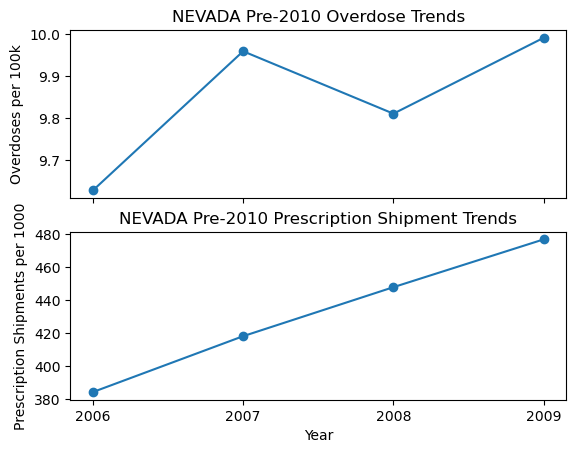

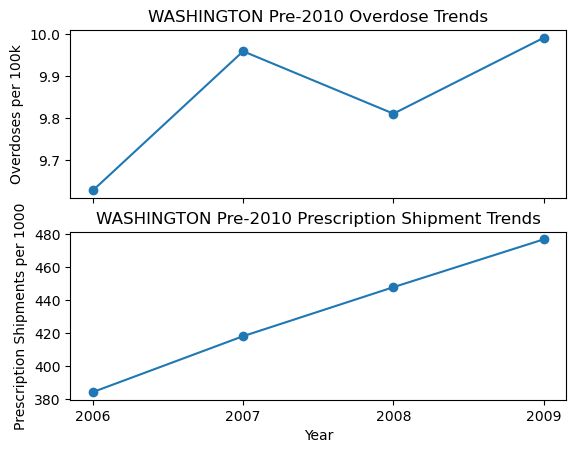

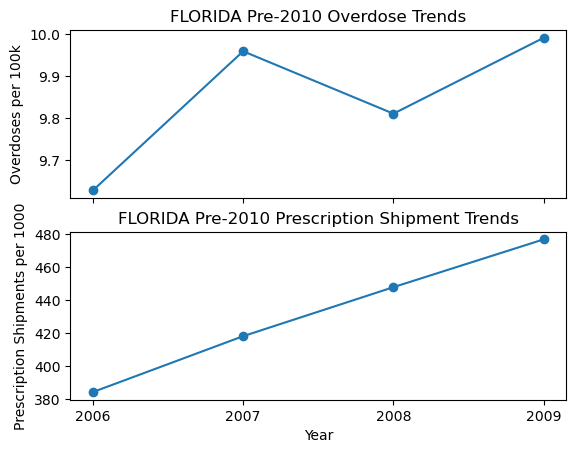

In [35]:
similar_states.add("FLORIDA")

for state in similar_states:
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    data = pre_2010.copy()
    data = data[data["state"] == state]

    data = pre_2010.groupby("year")[
        ["population", "overdose_per_100k", "prescriptions_per_1000"]
    ].mean()

    ax1.scatter(data.index, data["overdose_per_100k"])
    ax1.plot(data.index, data["overdose_per_100k"])

    ax2.scatter(data.index, data["prescriptions_per_1000"])
    ax2.plot(data.index, data["prescriptions_per_1000"])

    ax1.set(title=f"{state} Pre-2010 Overdose Trends", ylabel="Overdoses per 100k")
    ax2.set(
        title=f"{state} Pre-2010 Prescription Shipment Trends",
        ylabel="Prescription Shipments per 1000",
        xlabel="Year",
        xticks=data.index.astype(int),
    )

    plt.show()

## Control States

The states who have population, overdose, prescription shipment trends that are within 10% of Florida's trend before 2010 are Michigan, and Nevada. Based on this analysis, all both may be reasonable control states. Additional states that may be similar due to similar overdose and prescription shipment trends before 2010 are Louisiana, Oklahoma, and Tennessee. These other states, however, do not have a similar average population as Florida (within 30%), so their inclusion must be examined.


> `{'NEVADA', 'WASHINGTON'}`

In [ ]:
# Other states

similar_overdose_states & similar_prescription_states - {"FLORIDA"}

{'LOUISIANA', 'NEVADA', 'OKLAHOMA', 'TENNESSEE', 'WASHINGTON'}